<a href="https://colab.research.google.com/github/WilliamShengYangHuang/AALU_Coding/blob/main/exporting_latent_codes_pca_t_sne_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#@title
"""import json
from keras.utils.data_utils import get_file
from keras import backend as K

CLASS_INDEX = None
CLASS_INDEX_PATH = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'


def preprocess_input(x, dim_ordering='default'):
    if dim_ordering == 'default':
        dim_ordering = K.set_image_data_format('channels_first')
    assert dim_ordering in {'tf', 'th'}

    if dim_ordering == 'th':
        x[:, 0, :, :] -= 103.939
        x[:, 1, :, :] -= 116.779
        x[:, 2, :, :] -= 123.68
        # 'RGB'->'BGR'
        x = x[:, ::-1, :, :]
    else:
        x[:, :, :, 0] -= 103.939
        x[:, :, :, 1] -= 116.779
        x[:, :, :, 2] -= 123.68
        # 'RGB'->'BGR'
        x = x[:, :, :, ::-1]
    return x


def decode_predictions(preds, top=5):
    global CLASS_INDEX
    if len(preds.shape) != 2 or preds.shape[1] != 1000:
        raise ValueError('`decode_predictions` expects '
                         'a batch of predictions '
                         '(i.e. a 2D array of shape (samples, 1000)). '
                         'Found array with shape: ' + str(preds.shape))
    if CLASS_INDEX is None:
        fpath = get_file('imagenet_class_index.json',
                         CLASS_INDEX_PATH,
                         cache_subdir='models')
        CLASS_INDEX = json.load(open(fpath))
    results = []
    for pred in preds:
        top_indices = pred.argsort()[-top:][::-1]
        result = [tuple(CLASS_INDEX[str(i)]) + (pred[i],) for i in top_indices]
        results.append(result)
    return results"""

"import json\nfrom keras.utils.data_utils import get_file\nfrom keras import backend as K\n\nCLASS_INDEX = None\nCLASS_INDEX_PATH = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'\n\n\ndef preprocess_input(x, dim_ordering='default'):\n    if dim_ordering == 'default':\n        dim_ordering = K.set_image_data_format('channels_first')\n    assert dim_ordering in {'tf', 'th'}\n\n    if dim_ordering == 'th':\n        x[:, 0, :, :] -= 103.939\n        x[:, 1, :, :] -= 116.779\n        x[:, 2, :, :] -= 123.68\n        # 'RGB'->'BGR'\n        x = x[:, ::-1, :, :]\n    else:\n        x[:, :, :, 0] -= 103.939\n        x[:, :, :, 1] -= 116.779\n        x[:, :, :, 2] -= 123.68\n        # 'RGB'->'BGR'\n        x = x[:, :, :, ::-1]\n    return x\n\n\ndef decode_predictions(preds, top=5):\n    global CLASS_INDEX\n    if len(preds.shape) != 2 or preds.shape[1] != 1000:\n        raise ValueError('`decode_predictions` expects '\n                         'a batch o

## Import Packages

In [16]:
import skimage
import cv2
import os
import numpy as np
from sklearn import manifold, datasets
import pickle as pkl

import keras
from keras.preprocessing import image
from keras.models import Model
from keras.applications.vgg19 import VGG19
from skimage.transform import resize
#import imagenet_utils as imu
from keras.applications import imagenet_utils as imu

import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt

In [17]:
import cv2 as cv
from glob import glob
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Data

In [18]:
PATH = '/content/drive/My Drive/network/' #@param{type:'string'}

#images = [cv.imread(file, cv.COLOR_BGR2RGB) for file in glob(PATH + '/*.jpg')]
#print(len(images))

In [19]:
#@title
"""rootfolder = PATH
file_list = os.listdir(rootfolder)
print(file_list)"""

'rootfolder = PATH\nfile_list = os.listdir(rootfolder)\nprint(file_list)'

In [20]:
#@title
"""file_list_sorted = file_list.sort()
print(file_list_sorted)"""

'file_list_sorted = file_list.sort()\nprint(file_list_sorted)'

In [21]:
#@title
"""
#rootfolder = 'D:\\COMPUTER_VISION\\AAPR\\10000_imgs_aa_barrel_vault'
file_list = []
for i in range(len(os.listdir(rootfolder))):
  file_list.append(plt.imread(PATH + str(i+10000) + '.jpg'))

print(file_list)"""

"\n#rootfolder = 'D:\\COMPUTER_VISION\\AAPR\\10000_imgs_aa_barrel_vault'\nfile_list = []\nfor i in range(len(os.listdir(rootfolder))):\n  file_list.append(plt.imread(PATH + str(i+10000) + '.jpg'))\n\nprint(file_list)"

In [22]:
#np.array(file_list)

### Preview

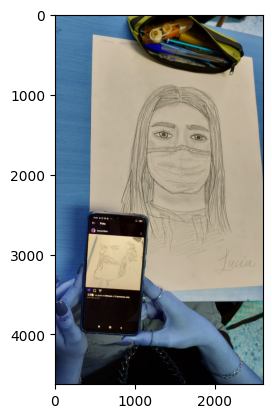

In [23]:
# Initialise the image stack with the first image
img = cv.imread(PATH + '1.jpg') # Mind the naming pattern
#print(img)
plt.imshow(img)

## PCA (principal component analysis)

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.decomposition as dp
import imageio
from skimage import io,transform,color
from skimage import img_as_ubyte
#from sklearn.datasets.base import load_iris
from PIL import Image
import cv2 as cv

In [25]:
num_imgs = 86 #@param{type:'integer'}

In [30]:
# Initialise im_stack as an empty list
im_stack = []

In [31]:
for i in range(1, num_imgs + 1):
    img = cv.imread(PATH + str(i) + '.jpg')
    if img is not None:
        img_gray = color.rgb2gray(img)

        # Set the new size for the image
        new_size = (256, 256)

        # Resize the image
        img_gray = cv.resize(img_gray, new_size, interpolation=cv.INTER_AREA)

        # Flatten the image and append it to the stack
        im_stack.append(img_gray.flatten())

# Convert im_stack to a NumPy array
im_stack = np.array(im_stack)

# Verify the shape of the image stack
assert im_stack.shape == (num_imgs, new_size[0] * new_size[1]), \
    "The shape of the image stack does not match the expected dimensions."

# Function to perform PCA on the image stack
def PCA(matrix, num_components=3):
    pca = dp.PCA(n_components=num_components)
    pca_features = pca.fit_transform(matrix)
    return pca_features

# Apply PCA to the image stack
low_matrix = PCA(im_stack)

# Display the PCA features for each image
for i, features in enumerate(low_matrix):
    print(f"Image {i+1} PCA features: {features}")

Image 1 PCA features: [86.54770265 25.88011749 10.38564889]
Image 2 PCA features: [103.72469466  -2.55368599 -14.37644363]
Image 3 PCA features: [97.74519657 -4.59738828 -0.25313548]
Image 4 PCA features: [56.57395285 30.0932503  -2.70789101]
Image 5 PCA features: [87.4465242  73.80802044 51.85243593]
Image 6 PCA features: [98.96082835 54.36738981  3.22712046]
Image 7 PCA features: [92.17019767  2.0629686  14.90662505]
Image 8 PCA features: [109.74383602 -11.66364498  -3.63149742]
Image 9 PCA features: [9.56558813e+01 5.56923479e-02 4.30216460e-01]
Image 10 PCA features: [ 92.55895046 -23.81354018  -5.24659507]
Image 11 PCA features: [102.29640749 -26.87667787  -3.45843073]
Image 12 PCA features: [ 89.18663832 -23.29587339   5.2006524 ]
Image 13 PCA features: [-40.42818927  -2.35652996   5.25464918]
Image 14 PCA features: [-39.18176673  -4.06708936   3.19444325]
Image 15 PCA features: [-35.75315909  -5.00806364   4.25506015]
Image 16 PCA features: [-35.97351678  -2.04268463   3.0396962

In [34]:
def PCA(matrix, num_components=3):
    # Load the PCA algorithm, set the principal component after dimensionality reduction to num_components
    pca = dp.PCA(n_components=num_components)
    # Dimensionality reduction on raw data
    pca_features = pca.fit_transform(matrix)

    # Print the first two PCA features for brevity
    print(pca_features[0])
    print(pca_features[1])

    # Print PCA features for each image
    for i in range(num_imgs):
        print(f"Image {i+1} PCA features: {pca_features[i]}")

    return pca_features

# Apply PCA to the image stack
low_matrix = PCA(im_stack)


[86.54770265 25.88011632 10.38560222]
[103.72469466  -2.5536853  -14.37636591]
Image 1 PCA features: [86.54770265 25.88011632 10.38560222]
Image 2 PCA features: [103.72469466  -2.5536853  -14.37636591]
Image 3 PCA features: [97.74519657 -4.59738585 -0.25324944]
Image 4 PCA features: [56.57395285 30.09325075 -2.70793889]
Image 5 PCA features: [87.4465242 73.8080204 51.8525104]
Image 6 PCA features: [98.96082835 54.36738911  3.22710233]
Image 7 PCA features: [92.17019767  2.06297077 14.90636656]
Image 8 PCA features: [109.74383602 -11.6636426   -3.63148815]
Image 9 PCA features: [9.56558813e+01 5.56912178e-02 4.30315992e-01]
Image 10 PCA features: [ 92.55895046 -23.81353699  -5.24678063]
Image 11 PCA features: [102.29640749 -26.87667924  -3.45835649]
Image 12 PCA features: [ 89.18663832 -23.29587117   5.20063693]
Image 13 PCA features: [-40.42818927  -2.35653011   5.25465662]
Image 14 PCA features: [-39.18176673  -4.06708945   3.19443757]
Image 15 PCA features: [-35.75315909  -5.00806395

## T-SNE (t-distributed stochastic neighbor embedding)

In [35]:
import pickle as pkl
import numpy as np
import os
from sklearn import manifold, datasets
import time

_n_dim = 3
_perplexity = 10
_learning_rate = 100
_scale = 1

tsne = manifold.TSNE(n_components=_n_dim, init='pca', random_state=0, perplexity=int(_perplexity), learning_rate=int(_learning_rate))
X_tsne = tsne.fit_transform(low_matrix) # Fit X into an embedded space and return that transformed output.
X_tsne  = X_tsne *_scale
output = X_tsne.tolist()
time=time.time()

for i in range(num_imgs):
    print(output[i])


[-18.218528747558594, -41.134803771972656, -74.5575942993164]
[-38.12913513183594, -49.31539535522461, -16.117206573486328]
[-26.977924346923828, -53.364315032958984, -33.30464172363281]
[-3.999087333679199, -23.284412384033203, -81.06590270996094]
[2.437739610671997, -45.37485885620117, -63.31148910522461]
[-12.57217025756836, -32.5386962890625, -58.006561279296875]
[-27.525606155395508, -64.38650512695312, -64.7193603515625]
[-36.19277572631836, -69.89668273925781, -19.178796768188477]
[-38.11225509643555, -61.27207565307617, -45.280548095703125]
[-1.0477432012557983, -69.3274154663086, -7.583034515380859]
[-17.017919540405273, -80.1847152709961, -10.400932312011719]
[0.32462427020072937, -76.78549194335938, -25.74770736694336]
[16.301488876342773, -22.477527618408203, 65.08746337890625]
[39.16374588012695, 33.32867431640625, 45.41013717651367]
[-5.652621746063232, 35.048954010009766, 13.92595386505127]
[-18.113718032836914, 28.249345779418945, 55.42906951904297]
[51.85878372192383, 

### Simple Visualisation

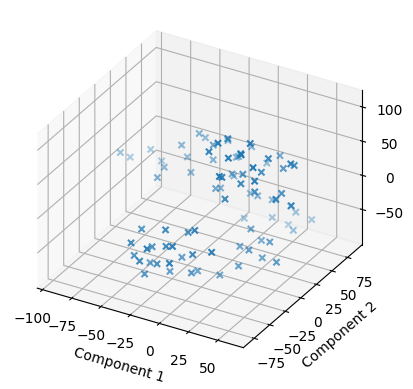

In [36]:
# Plotting the results in a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot without perspective (orthographic projection)
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], marker = 'x')
ax.set_proj_type('ortho')  # Setting orthographic projection

# Labeling axes
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

# Show the plot
plt.show()


[0.0007383 0.0007383 0.0007383 0.0007383 0.0007383 0.0007383 0.0007383
 0.0007383 0.0007383 0.0007383 0.0007383 0.0007383 0.0007383 0.0007383
 0.0007383 0.0007383 0.0007383 0.0007383 0.0007383 0.0007383 0.0007383
 0.0007383 0.0007383 0.0007383 0.0007383 0.0007383 0.0007383 0.0007383
 0.0007383 0.0007383 0.0007383 0.0007383 0.0007383 0.0007383 0.0007383
 0.0007383 0.0007383 0.0007383 0.0007383 0.0007383 0.0007383 0.0007383
 0.0007383 0.0007383 0.0007383 0.0007383 0.0007383 0.0007383 0.0007383
 0.0007383 0.0007383 0.0007383 0.0007383 0.0007383 0.0007383 0.0007383
 0.0007383 0.0007383 0.0007383 0.0007383 0.0007383 0.0007383 0.0007383
 0.0007383 0.0007383 0.0007383 0.0007383 0.0007383 0.0007383 0.0007383
 0.0007383 0.0007383 0.0007383 0.0007383 0.0007383 0.0007383 0.0007383
 0.0007383 0.0007383 0.0007383 0.0007383 0.0007383 0.0007383 0.0007383
 0.0007383 0.0007383]


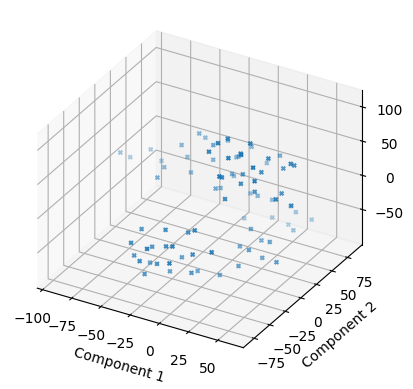

In [37]:
from sklearn.neighbors import KernelDensity
from mpl_toolkits.mplot3d import Axes3D

# Compute kernel density estimates for each point in the t-SNE data
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(X_tsne)
densities = kde.score_samples(X_tsne)  # Log density
densities = np.exp(densities)  # Convert log density to actual density
print(densities)

# Scale densities for marker sizes in the plot
density_scale = 10**4  # Scale factor for better visualisation
marker_sizes = densities * density_scale

# Creating the 3D scatter plot with marker sizes based on local kernel density
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot without perspective, marker sizes based on density
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], marker='x', s=marker_sizes)

# Setting orthographic projection
ax.set_proj_type('ortho')

# Labeling axes
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

# Show the plot
plt.show()

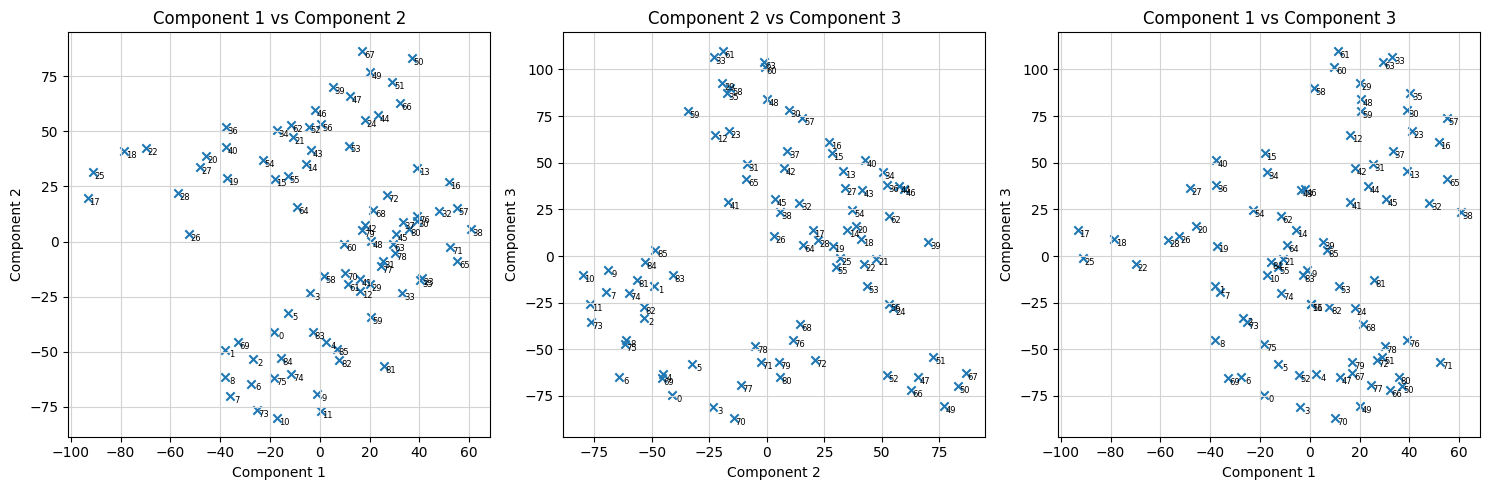

In [38]:
# Adjusting the annotation font size and adding gridlines to the scatter plots

# Re-creating the subplots with smaller font size for annotations and added gridlines
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Define a function for plotting and annotating with smaller font and gridlines
def plot_and_annotate(ax, x_data, y_data, title, xlabel, ylabel):
    ax.scatter(x_data, y_data, marker = 'x')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True, color = 'lightgrey')  # Adding gridlines
    for i, (x, y) in enumerate(zip(x_data, y_data)):
        ax.annotate(i, (x, y), textcoords="offset points", xytext=(5,-5), ha='center', fontsize=6)  # Smaller font size

# Component 1 vs Component 2 with annotations
plot_and_annotate(axs[0], X_tsne[:, 0], X_tsne[:, 1], 'Component 1 vs Component 2', 'Component 1', 'Component 2')

# Component 2 vs Component 3 with annotations
plot_and_annotate(axs[1], X_tsne[:, 1], X_tsne[:, 2], 'Component 2 vs Component 3', 'Component 2', 'Component 3')

# Component 1 vs Component 3 with annotations
plot_and_annotate(axs[2], X_tsne[:, 0], X_tsne[:, 2], 'Component 1 vs Component 3', 'Component 1', 'Component 3')

# Display the annotated plots
plt.tight_layout()
plt.show()


[ 57.36110445  39.69618884  57.61616424  60.73404131  64.7045184
  55.01059223  55.56147729  41.27871155  42.46659763  46.19223047
  40.91707021  35.50895798  87.66352442  50.90166538  63.06661983
  52.87558935  45.15741968  14.5752652   20.32203986  41.23075903
  38.004792    64.9500782   22.48880741  70.80332692  56.14892591
  17.19135737  17.23288725  36.76724892  28.03237612  92.45166958
  88.06210514 103.06812425  67.95225313  74.0038385   57.76314667
  70.86230727  35.99746225  94.76126849  42.29299893  50.98866978
  42.5539588   92.98303507  89.23585989  66.31493461  51.01643262
 101.34003013  60.37389236  55.97319358  99.71567576  44.00552577
  25.56612478  40.859005    65.65036368  59.72159649  55.49639721
  57.29613801  65.56263029  51.75628248  68.93860874  68.24774577
  81.01050052  86.10267292  61.07183791 103.75512351  45.05355346
  47.89762987  40.2032008   32.98703268  83.67381907  45.37838915
  86.10329439  60.07149259  75.85971886  44.86322868  62.39296042
  61.936183

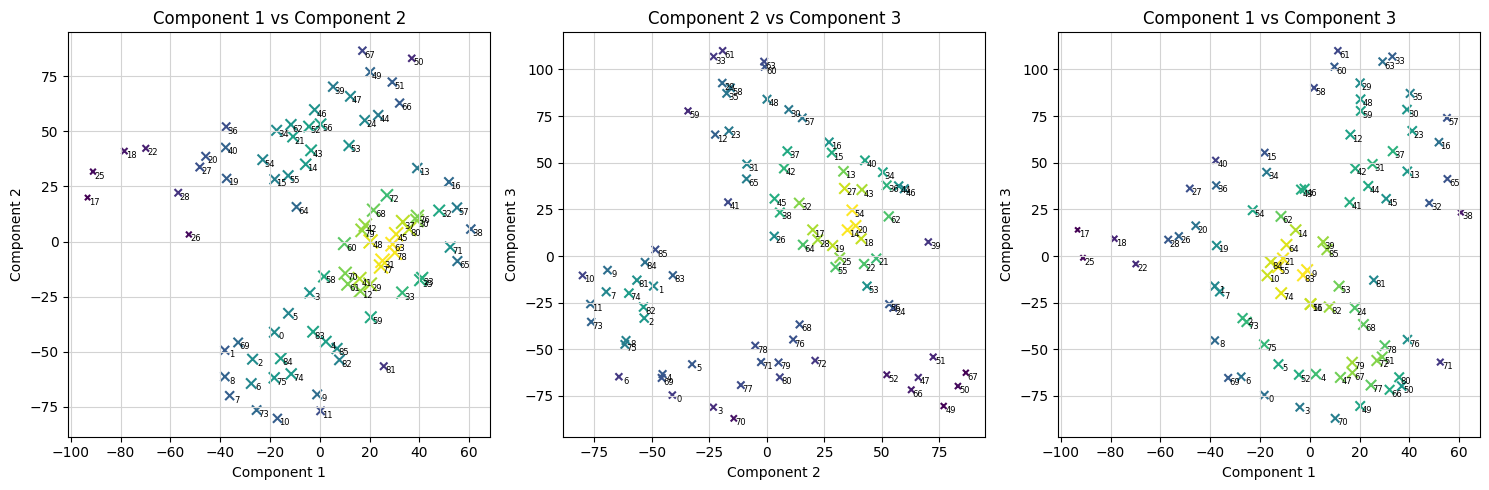

In [39]:
from scipy.stats import gaussian_kde

# Re-creating the subplots with density-based marker sizes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Define a function for plotting and annotating with density-based marker sizes
def plot_and_annotate(ax, x_data, y_data, title, xlabel, ylabel):
    # Calculating the point density
    xy = np.vstack([x_data, y_data])
    scale = 10**6
    z = gaussian_kde(xy)(xy)*scale

    # Scatter plot with density-based marker sizes
    ax.scatter(x_data, y_data, s=z, marker='x', c=z)  # Scaling marker size by density
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True, color='lightgrey')  # Adding gridlines
    for i, (x, y) in enumerate(zip(x_data, y_data)):
        ax.annotate(i, (x, y), textcoords="offset points", xytext=(5,-5), ha='center', fontsize=6)  # Smaller font size
    print(z)

# Component 1 vs Component 2 with density-based marker sizes
plot_and_annotate(axs[0], X_tsne[:, 0], X_tsne[:, 1], 'Component 1 vs Component 2', 'Component 1', 'Component 2')

# Component 2 vs Component 3 with density-based marker sizes
plot_and_annotate(axs[1], X_tsne[:, 1], X_tsne[:, 2], 'Component 2 vs Component 3', 'Component 2', 'Component 3')

# Component 1 vs Component 3 with density-based marker sizes
plot_and_annotate(axs[2], X_tsne[:, 0], X_tsne[:, 2], 'Component 1 vs Component 3', 'Component 1', 'Component 3')

# Display the annotated plots
plt.tight_layout()
plt.show()


## Save CSV

In [40]:
# Convert the list to an array
my_array = np.array(output)

# Save the array as a CSV file
f_name = 'Latent_codes_30-nov' #@param{type:'string'}
np.savetxt(f_name + '.csv', my_array, delimiter=',')

## Save Model

In [ ]:
"""
from pathlib import Path
features = np.stack(low_matrix, axis=0)

# rootfolder2 = Path + '_features'
rootfolder2 = '/content/drive/My Drive/'
fileName = os.path.join(rootfolder2,'pca_pool')
fileObject = open(fileName, 'wb')
pkl.dump(features, fileObject)
fileObject.close()
"""